In [19]:
import nltk, collections
import numpy as np
from nltk.collocations import *
from nltk.corpus import stopwords
import subprocess
import pandas as pd
import re
from sklearn.externals import joblib
import random

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import candidate_list_gen
import dataframe_generation
import Classifier
import math
import index_generator

In [2]:
import preprocessing
# This reads the *.tex sources and dumps them to a file
preprocessing.dump_detex_data()
feature_list_from_tex = ["indices","sections","subsections","large","underline","italicized","bold"]

Processed 88 source files and dumped data


In [3]:
feature_dict = preprocessing.populate_properties()

In [4]:
df = pd.DataFrame([])
for filename in feature_dict:
    feature_dict[filename]["candidate_list"] = candidate_list_gen.process_text(feature_dict[filename]["plaintext"])
    df = df.append(dataframe_generation.generate_dataframe(filename,feature_dict[filename],feature_list_from_tex))


In [5]:
df = dataframe_generation.add_tf_idf(df)


In [6]:
df[["word","idf","indices"]].to_csv("word_idf.csv")

In [12]:
#split data set into test, train, evaluation

test_files = ["dataset/discover_physics/ch02/ch02.tex","dataset/general_relativity/ch03/ch03.rbtex","dataset/general_relativity/ch05/ch05.rbtex","dataset/calculus/ch07/ch07.tex","dataset/fundamentals-of-calculus/ch05/ch05.rbtex","dataset/discover_physics/ch05/ch05.tex"]
evaluation_files = ["dataset/discover_physics/ch04/ch04.tex"]
non_train_files = test_files + evaluation_files


df_test = pd.DataFrame([])
df_train = pd.DataFrame([])
df_evaluation = pd.DataFrame([])

df_test = df.loc[df.filename.isin(test_files),]
print(df_test.shape)
print(df_test[df_test.indices==1])

df_train = df.loc[~df.filename.isin(non_train_files),]
df_train = df_train.append([df_train[df_train.indices==1]]*100)
print(df_train.shape)
print(df_train[df_train.indices==1])

df_evaluation = df.loc[df.filename.isin(evaluation_files),]
print(df_evaluation[df_evaluation.indices==1])


(9529, 29)
        CD  FW  JJ  JJR  JJS  NN  NNP  NNPS  NNS  SYM     ...      italicized  \
7833     0   0   0    0    0   1    0     0    0  NaN     ...               0   
8030     0   0   0    0    0   1    0     0    0  NaN     ...               0   
8392     0   0   0    0    0   0    1     0    0  NaN     ...               0   
8529     0   0   1    0    0   0    0     0    0  NaN     ...               1   
8575     0   0   0    0    0   0    1     0    0  NaN     ...               0   
8905     0   0   0    0    0   1    0     0    0  NaN     ...               0   
9023     0   0   0    0    0   0    1     0    0  NaN     ...               0   
9264     0   0   0    0    0   1    0     0    0  NaN     ...               0   
10966    0   0   0    0    0   1    0     0    0  NaN     ...               1   
11102    0   0   0    0    0   0    1     0    0  NaN     ...               0   
11374    0   0   0    0    0   0    1     0    0  NaN     ...               0   
11404    0   0   

        CD  FW  JJ  JJR  JJS  NN  NNP  NNPS  NNS  SYM     ...      italicized  \
391      0   0   0    0    0   1    0     0    0  NaN     ...               1   
406      0   0   1    0    0   0    0     0    0  NaN     ...               0   
588      0   0   0    0    0   1    0     0    0  NaN     ...               1   
655      0   0   0    0    0   0    0     0    1  NaN     ...               0   
741      0   0   0    0    0   1    0     0    0  NaN     ...               0   
1073     0   0   0    0    0   1    0     0    0  NaN     ...               0   
1243     0   0   0    0    0   1    0     0    0  NaN     ...               0   
1286     0   0   1    0    0   0    0     0    0  NaN     ...               0   
1519     0   0   1    0    0   0    0     0    0  NaN     ...               0   
1901     0   0   0    0    0   1    0     0    0  NaN     ...               0   
1938     0   0   1    0    0   0    0     0    0  NaN     ...               0   
3239     0   0   0    0    0

In [29]:
df_evaluation.shape

(2039, 32)

In [13]:
#Train and test

feature_list = ['NN', 'NNP', 'NNS', 'VBG', 'VBD', 'VBN','VBZ', 'VBP', 'VB', 'CD', 'JJ', 'JJS', 'JJR', 'FW', 'NNPS','sections', 'subsections', 'large', 'underline','tf-idf','italicized', 'bold']


x_train = df_train[feature_list]
x_test = df_test[feature_list]

y_train = df_train["indices"]
y_test = df_test["indices"]


#rfc= RandomForestClassifier()
rfc =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

rfc.fit(x_train, y_train)

pred_test = rfc.predict(x_test)

df_test["pred"] = pred_test


TP, FP, TN, FN   : 53 1382 8081 13
The index words generated by the model are
[1 0 0 ..., 0 0 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

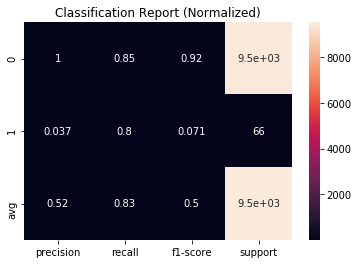

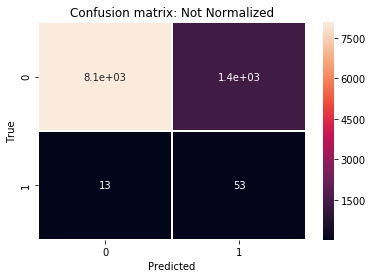

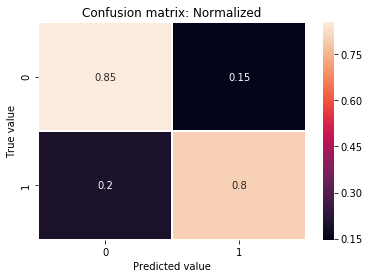

In [20]:
Classifier.Evaluate_accuracy(pred_test, y_test.tolist())

In [15]:
#Evaluate

x_eval = df_evaluation[feature_list]
y_eval = df_evaluation["indices"]
pred_evaluation = rfc.predict(x_eval)
pred_prob = rfc.predict_proba(x_eval)

index_prob = [ele[1] for ele in pred_prob]

df_evaluation["pred"] = pred_evaluation
df_evaluation["pred_prob"] = index_prob
df_evaluation["score"] = df_evaluation["pred_prob"] + 0.1 * df_evaluation['NN'] +  0.1 * df_evaluation['NNP'] +  (df_evaluation["idf"])/4

In [33]:


df_pred_indices = df_evaluation[df_evaluation["pred"]==1]
print(df_pred_indices[["word","pred_prob","score"]].sort_values("pred_prob",ascending=False).head(100))
df_actual_indices = df_evaluation[df_evaluation["indices"]==1]
print(df_actual_indices[["word","pos","tf-idf","wordcount","idf","score","pred_prob"]].sort_values("score",ascending=False))
pd.merge(df_pred_indices[["word","pred_prob"]],df_actual_indices[["word","pred_prob"]],on='word',how='inner').sort_values("pred_prob_x",ascending=False)

                word  pred_prob     score
94698         energy   0.982819  1.313317
93389           mass   0.938955  1.299793
94142             nt   0.931297  1.414521
93667      photogate   0.926692  1.972740
94640           cart   0.926595  1.799355
94289   conservation   0.925799  1.361259
94233            air   0.912107  1.298390
93047          water   0.905385  1.310195
93221  gravitational   0.901596  1.226416
93907         weight   0.895270  1.421457
94201        alcohol   0.890731  1.835412
93195          flask   0.886457  1.831138
93136          weigh   0.886457  1.831138
93391             mL   0.886283  1.932331
94208    Social Text   0.884708  1.830755
94080        pipette   0.881317  1.927364
93297           coin   0.877842  1.521530
92925        kinetic   0.875371  1.189986
93610         volume   0.875306  1.300127
93544            oil   0.874676  1.747437
93942       friction   0.873104  1.543132
93151          track   0.871520  1.318093
93646        release   0.870578  1

,word,pred_prob_x,pred_prob_y
10,energy,0.982819,0.982819
2,mass,0.938955,0.938955
8,conservation,0.925799,0.925799
0,gravity,0.868206,0.868206
5,light,0.862151,0.862151
3,symmetry,0.836614,0.836614
4,Optics,0.821894,0.821894
7,moon,0.776455,0.776455
1,field,0.764971,0.764971
6,Lavoisier,0.756252,0.756252


In [27]:
df_actual_indices[["word","pred_prob"]].sort_values("pred_prob",ascending=False)

,word,pred_prob
94698,energy,0.982819
93389,mass,0.938955
94289,conservation,0.925799
92712,gravity,0.868206
94014,light,0.862151
93499,symmetry,0.836614
93546,Optics,0.821894
94253,moon,0.776455
92941,field,0.764971
94081,Lavoisier,0.756252
